day            0
month          1
year           1
Temperature    1
RH             1
Ws             1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64
Classes
1    0.563786
0    0.436214
Name: proportion, dtype: float64
                  day     month  year  Temperature        RH        Ws  \
day          1.000000 -0.000369   NaN     0.097227 -0.076034  0.047812   
month       -0.000369  1.000000   NaN    -0.056781 -0.041252 -0.039880   
year              NaN       NaN   NaN          NaN       NaN       NaN   
Temperature  0.097227 -0.056781   NaN     1.000000 -0.651400 -0.284510   
RH          -0.076034 -0.041252   NaN    -0.651400  1.000000  0.244048   
Ws           0.047812 -0.039880   NaN    -0.284510  0.244048  1.000000   
Rain        -0.112523  0.034822   NaN    -0.326492  0.222356  0.171506   
FFMC         0.224956  0.017030   NaN     0.676568 -0.644873 -0.166548 

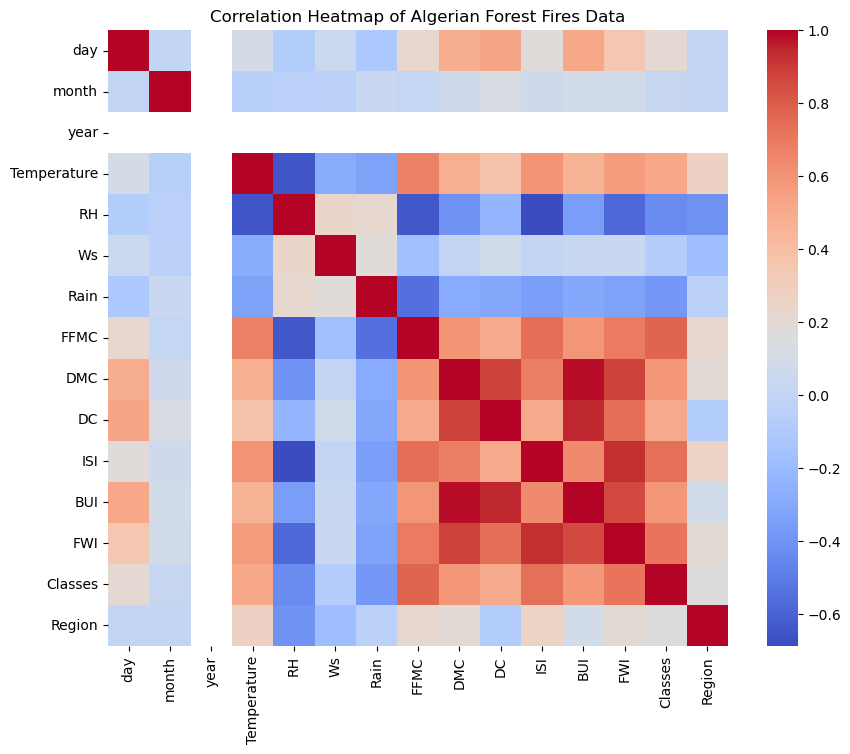

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 246
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  243 non-null    int64  
 1   RH           243 non-null    int64  
 2   Ws           243 non-null    int64  
 3   Rain         243 non-null    float64
 4   FFMC         243 non-null    float64
 5   DMC          243 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          243 non-null    float64
 8   BUI          243 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      243 non-null    int64  
 11  Region       243 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 24.7 KB
None
       Temperature          RH          Ws        Rain        FFMC  \
count   243.000000  243.000000  243.000000  243.000000  243.000000   
mean     32.152263   62.041152   15.493827    0.762963   77.842387   
std       3.628039   14.828160    2.811385    

In [1]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Veri setini oku
df = pd.read_csv("4-Algerian_forest_fires_dataset.csv")

# 2️⃣ Gereksiz boşlukları sütun adlarından temizle
df.columns = df.columns.str.strip()

# 3️⃣ Boş satırları veya başlık içeren yanlış satırları kaldır
df.dropna(how='all', inplace=True)
df = df[df["day"] != "day"]

# 4️⃣ Region (bölge) sütunu ekle
df.loc[:122, "Region"] = 0   # Bejaia bölgesi
df.loc[123:, "Region"] = 1   # Sidi-Bel Abbes bölgesi

# 5️⃣ Eksik verileri kontrol et
print(df.isnull().sum())

# 6️⃣ Gerekirse eksik verileri temizle
df.dropna(inplace=True)

# 7️⃣ Sayısal sütunları int/float’a dönüştür
df[["day","month","year","Temperature","RH","Ws"]] = df[["day","month","year","Temperature","RH","Ws"]].astype(int)
df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]] = df[["Rain","FFMC","DMC","DC","ISI","BUI","FWI"]].astype(float)

# 8️⃣ Classes sütunundaki değerleri düzenle (“fire” ve “not fire”)
df["Classes"] = np.where(df["Classes"].str.contains("not fire"), 0, 1)

# 9️⃣ Sonuç kontrolü
print(df["Classes"].value_counts(normalize=True))

# 🔟 Korelasyon analizi
corr_matrix = df.corr()
print(corr_matrix)

# 11️⃣ Korelasyon ısı haritası
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap of Algerian Forest Fires Data")
plt.show()

# 12️⃣ Gereksiz sütunları kaldır (gün, ay, yıl)
df.drop(["day", "month", "year"], axis=1, inplace=True)

# 13️⃣ Son DataFrame bilgisi
print(df.info())

# 14️⃣ Sonuçların istatistiksel özeti
print(df.describe())

# 15️⃣ Final kontrol: sınıflar ve bölge dağılımı
print(df["Classes"].value_counts())
print(df["Region"].value_counts())

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
242,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0
243,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1.0
244,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1.0
245,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1.0
